In [6]:
import pandas as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import zero_one_loss

sns.set_theme()
Dataset = pd.read_csv('wdbc_normalizacao.csv')
#Dataset.round(2)
Dataset

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Para Validação Dividimos os Dados:** 
- **Treino**,75%
- **Validação**, 10%
- **Teste**, 15%

In [7]:
from sklearn.model_selection import train_test_split

# Dividindo em treino e teste 85% (treino + validação) e 15% teste:
D_treino, D_teste = train_test_split(Dataset, test_size=.15, random_state=30) #test_size, por padrão é 25%

print("D_treino e Validação: ", D_treino.shape, dict(D_treino.iloc[:, 0].value_counts()))
print("D_teste: ", D_teste.shape, dict(D_teste.iloc[:, 0].value_counts()))

D_treino e Validação:  (483, 31) {0: 305, 1: 178}
D_teste:  (86, 31) {0: 52, 1: 34}


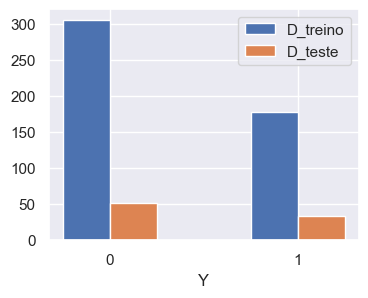

In [8]:
# visualizar as amostras:
plt.figure(figsize=(4,3))
plt.hist([D_treino.iloc[:, 0], D_teste.iloc[:, 0]], bins=[0,1,2], align='left', rwidth=0.5)
plt.legend(['D_treino','D_teste'])
plt.xlabel('Y'), plt.xticks([0,1])
plt.show()

**Árvore de Decisão**:

In [9]:
from sklearn import tree

M = tree.DecisionTreeClassifier()
M

DecisionTreeClassifier()

In [10]:
# Selecionado os atributos e classes de (treino + validação) e teste.
X_treino = D_treino.iloc[:, 1:31]
Y_treino = D_treino.iloc[:, 0]
print("D_treino: ", (X_treino.shape, Y_treino.shape))

X_teste = D_teste.iloc[:, 1:31]
Y_teste = D_teste.iloc[:, 0]
print("D_teste: ", (X_teste.shape, Y_teste.shape))


D_treino:  ((483, 30), (483,))
D_teste:  ((86, 30), (86,))


Erro no conjunto de teste: 0.06976744186046513


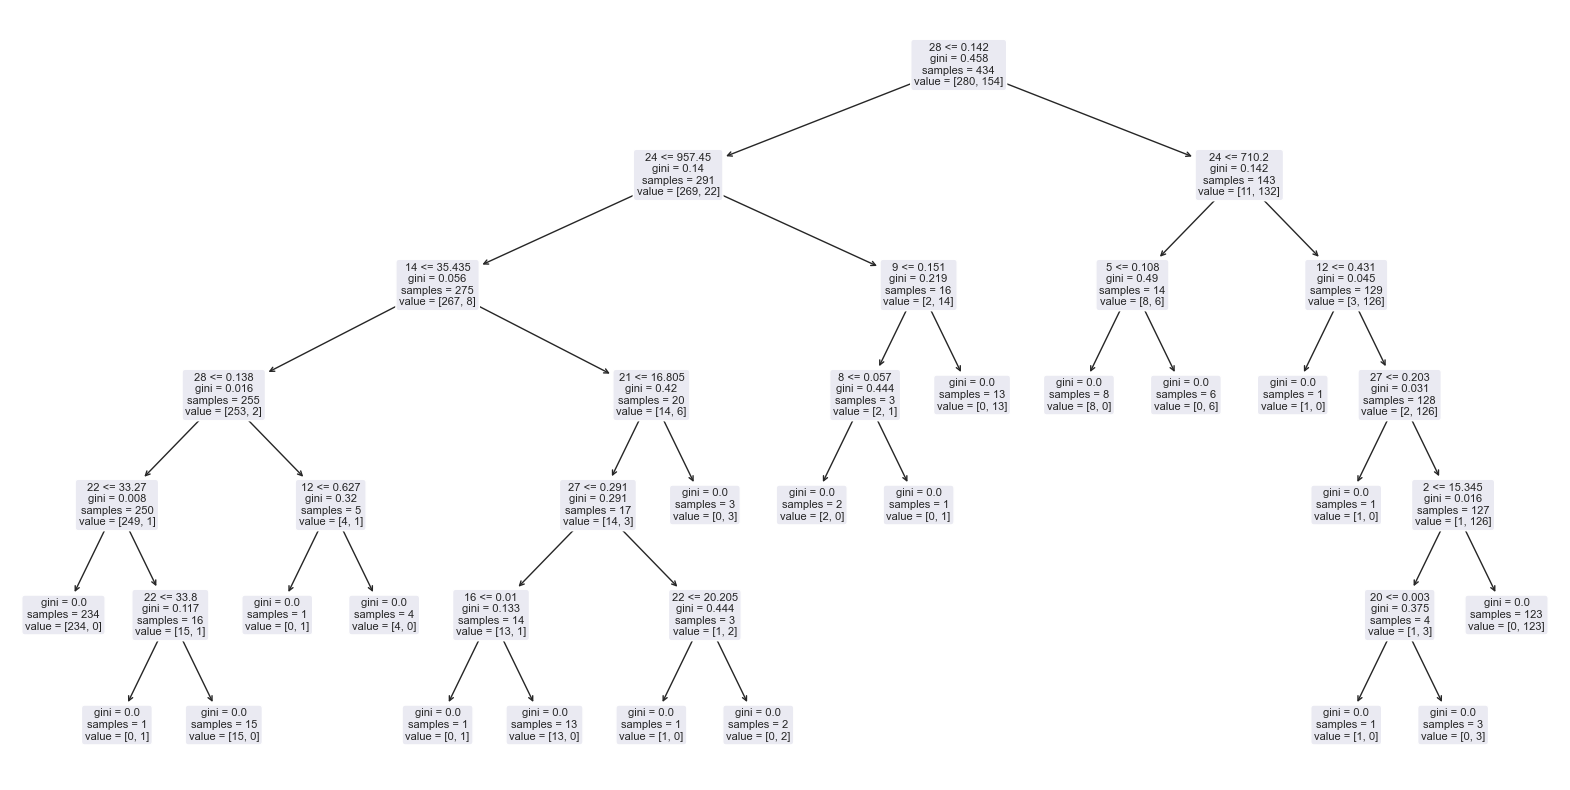

Erro no conjunto de teste: 6.98%


In [14]:
from sklearn.metrics import zero_one_loss
# Dividindo em  dados de treino e validação 10%
X_train, X_val, y_train, y_val = train_test_split(X_treino, Y_treino, test_size=0.1, random_state=30)

g = M.fit(X_train, y_train)
Y_pred = g.predict(X_teste)

# Calcular o erro
e = zero_one_loss(Y_teste, Y_pred)
print("Erro no conjunto de teste:", e)

# Arvore de decisão Completa
plt.figure(figsize=(20, 10))
_ = tree.plot_tree(g, feature_names=X_train.columns, rounded=True, fontsize=8)
plt.show()
print("Erro no conjunto de teste: {:.2f}%".format(e * 100))


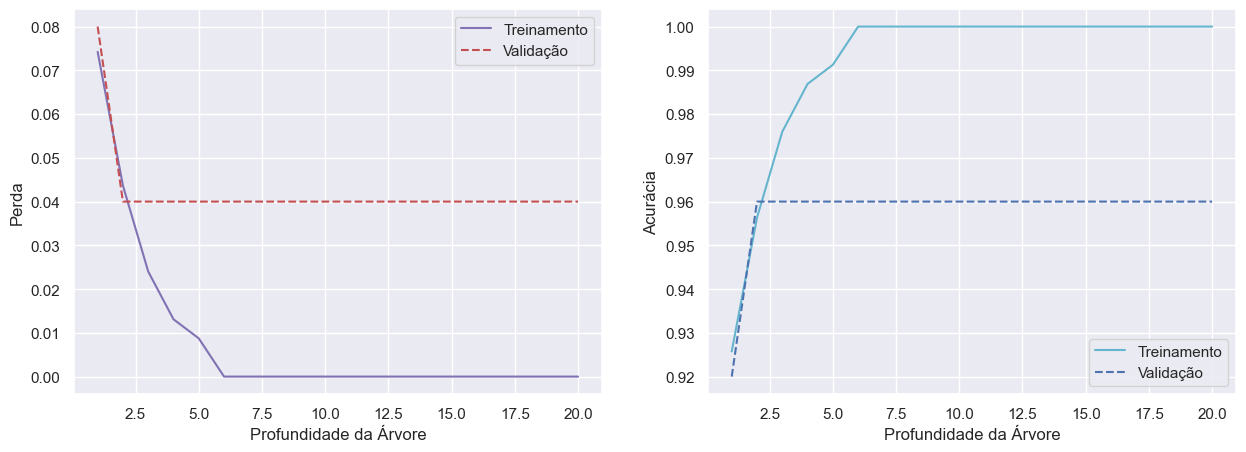

In [66]:
from sklearn.metrics import accuracy_score

# Simulando para diferentes profundidades da árvore Temos:
depths = range(1, 21)
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

for depth in depths:
    # Inicializar o modelo com a profundidade máxima especificada
    M = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Treinar o modelo
    M_final = M.fit(X_train, y_train)
    
    # Predições no conjunto de treino e validação
    y_pred_train = M.predict(X_train)
    y_pred_val = M.predict(X_val)
    
    # Calcular acurácia
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    
    # Calcular perda 
    train_loss = 1 - train_accuracy
    val_loss = 1 - val_accuracy
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plotar histórico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Simular "épocas" com diferentes profundidades
epochs = range(1, len(depths) + 1)

# Plotar perda (loss)
ax1.plot(epochs, train_losses, 'm', label='Treinamento')
ax1.plot(epochs, val_losses, 'r--', label='Validação')
ax1.set_xlabel('Profundidade da Árvore')
ax1.set_ylabel('Perda')
ax1.legend()

# Plotar acurácia (accuracy)
ax2.plot(epochs, train_accuracies, 'c', label='Treinamento')
ax2.plot(epochs, val_accuracies, 'b--', label='Validação')
ax2.set_xlabel('Profundidade da Árvore')
ax2.set_ylabel('Acurácia')
ax2.legend()

plt.show()


## Avaliação do modelo

In [67]:
def confidence(N=30, epsilon=0.1):
    return max(0, 1 - 2*np.e**(-2*N*epsilon**2))

In [74]:
# Nos experimentos meça o erro de generalização com diferentes tamanhos de árvores
#temos para as profundidades:
depths = [1,2, 3, 5, 7, 10, 20]

# Para cada profundidade temos:
for depth in depths:
    model = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_teste)
    # Calculo  do erro 
    error = zero_one_loss(Y_teste, y_pred)
    print("Profundidade da Árvore:", depth, "- Erro de Generalização:", error)


Profundidade da Árvore: 1 - Erro de Generalização: 0.12790697674418605
Profundidade da Árvore: 2 - Erro de Generalização: 0.06976744186046513
Profundidade da Árvore: 3 - Erro de Generalização: 0.06976744186046513
Profundidade da Árvore: 5 - Erro de Generalização: 0.05813953488372092
Profundidade da Árvore: 7 - Erro de Generalização: 0.06976744186046513
Profundidade da Árvore: 10 - Erro de Generalização: 0.06976744186046513
Profundidade da Árvore: 20 - Erro de Generalização: 0.06976744186046513


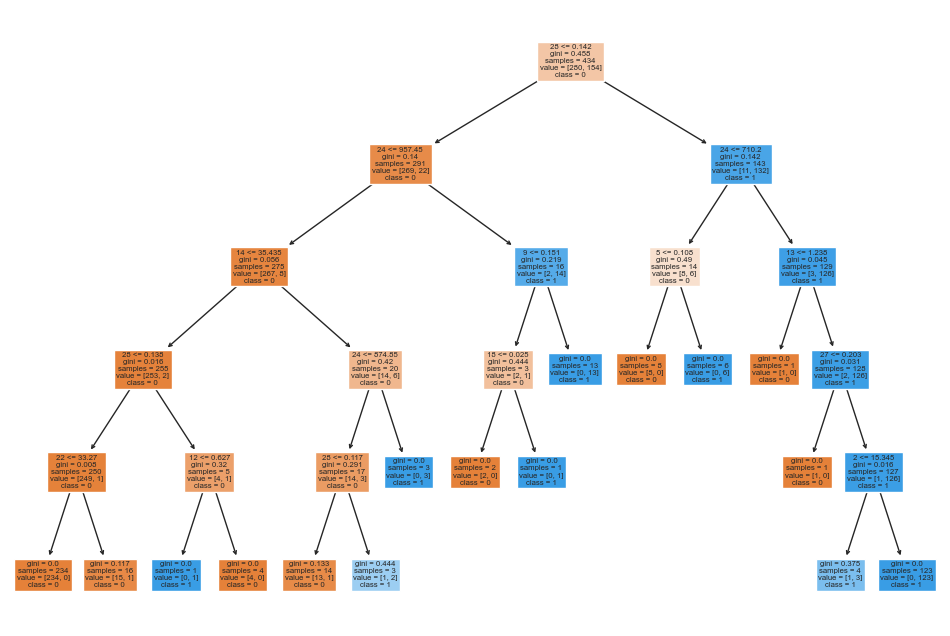

In [21]:
#Podemos notar que com a profundidade 5, econtramos a avore de descisão ideal.
model = tree.DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Plotar a árvore IDEAL
plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()

### Matriz de confusão

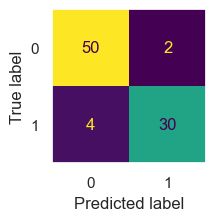

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_teste, Y_pred)
with sns.plotting_context(rc={'grid.linewidth': 0}):
    fig, ax = plt.subplots(figsize=(2,2))
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(ax=ax, colorbar=False)

### Definindo as Métricas de Performance.

### Relatório de classificação

In [24]:
from sklearn.metrics import classification_report

target_names = ['Outcome 0', 'Outcome 1']
print(classification_report(Y_teste, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Outcome 0       0.93      0.96      0.94        52
   Outcome 1       0.94      0.88      0.91        34

    accuracy                           0.93        86
   macro avg       0.93      0.92      0.93        86
weighted avg       0.93      0.93      0.93        86

